# Which Car is Best ? Analysing and Predicting MOT Test Results

In this experiment, we will be analysing the MOT test results of cars in the UK. The MOT test is an annual test of vehicle safety, roadworthiness aspects and exhaust emissions required in the United Kingdom for most vehicles over three years old. The MOT test is designed to ensure that a vehicle is roadworthy and safe to drive. The test checks the vehicle against a number of criteria, including the condition of the vehicle's brakes, lights, tyres, exhaust emissions, and more.

The dataset we will be using in this experiment is the [UK MOT test results dataset](https://www.data.gov.uk/dataset/e3939ef8-30c7-4ca8-9c7c-ad9475cc9b2f/anonymised-mot-tests-and-results) for 2023. Information includes the make, model, and year of the car, as well as the overal test result.

Let us start by loading the dataset and taking a look at the first few rows.

In [2]:
# Load .data/mot/test_results.csv as a dataframe

import pandas as pd

mot = pd.read_csv('.data/mot/test_result.csv', sep='|')

# drop the test_id and vehicle_id columns
mot = mot.drop(['test_id'], axis=1)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25


Let us also load a few lookup tables that will help us in our analysis, and merge them with the main dataset.

In [3]:
# Load .data/mot/lookup/mdr_fuel_types.csv as a dataframe
fuel_types = pd.read_csv('.data/mot/lookup/mdr_fuel_types.csv', sep='|')

# Merge the two dataframes on the fuel_type column
mot = pd.merge(mot, fuel_types, left_on='fuel_type', right_on='type_code', how='left', suffixes=('', '_desc'))

# Load .data/mot/lookup/mdr_test_outcome.csv as a dataframe
test_outcome = pd.read_csv('.data/mot/lookup/mdr_test_outcome.csv', sep='|')
mot = pd.merge(mot, test_outcome, left_on='test_result', right_on='result_code', how='left', suffixes=('', '_desc'))
mot.drop(['type_code', 'result_code'], axis=1, inplace=True)
mot.rename(columns={'result': 'test_result_desc'}, inplace=True)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed


This is a reasonably large dataset with over 41 million rows and 13 columns. For this experiment, we will be focusing on a subset of cars - the top 20 most tested cars in the dataset. We will be analysing the test results of these cars and building a machine learning model to predict the test result of a car based on its features, including make, model and mileage.

## Pre-processing

First let us perform some simple pre-processing steps on the dataset, to remove any data that is not relevant to our analysis and to perform some basic tidying. We will also calculate a few additional columns that will be useful for our analysis.

In [4]:
# Drop any first_use and test_date before 1970, to avoid invalid ages due to the UNIX epoch
mot = mot[mot['first_use_date'] >= '1970-01-01']
mot = mot[mot['test_date'] >= '1970-01-01']

# Calculate an age column (in days) based on the test_date and first_use_date columns
mot['test_date'] = pd.to_datetime(mot['test_date'])
mot['first_use_date'] = pd.to_datetime(mot['first_use_date'])
mot['age'] = (mot['test_date'] - mot['first_use_date']).dt.days
mot['age_years'] = mot['age'] / 365.25

# Combine make and model into one column
mot['make_model'] = mot['make'] + ' ' + mot['model']  # Combine make and model into one column

# Let us focus on data where cylinder capacity is between 500 and 5000
mot = mot[(mot['cylinder_capacity'] >= 500) & (mot['cylinder_capacity'] <= 5000)]

# If test_result_desc is 'Passed', or 'Pass with Rectification at Station', test_result_class is 'Pass'
# If test_result_desc is 'Failed', test_result_class is 'Fail'
# If anything else, test_result_class is 'Other'
mot['test_result_class'] = 'Other'
mot.loc[mot['test_result_desc'].isin(['Passed', 'Pass with Rectification at Station']), 'test_result_class'] = 'Pass'
mot.loc[mot['test_result_desc'] == 'Failed', 'test_result_class'] = 'Fail'

# Drop any negative ages, as they are likely to be errors
mot = mot[mot['age'] >= 0]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model,test_result_class
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed,2390,6.543463,TOYOTA PRIUS +,Pass
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed,5223,14.299795,TOYOTA PRIUS,Pass
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station,4735,12.963723,TOYOTA PRIUS,Pass
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed,5759,15.767283,TOYOTA PRIUS,Fail
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed,5759,15.767283,TOYOTA PRIUS,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed,8857,24.249144,HONDA BEAT,Pass
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed,2677,7.329227,RENAULT MASTER,Pass
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed,5092,13.941136,PEUGEOT 207,Pass
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed,5302,14.516085,NISSAN MICRA,Pass


That's looking better, and we now have a couple of more columns - a combined make and model column, and a column for the age of the car based on the first use date and the actual test date. Now let us sample the top 20 most tested cars from the dataset, we will also filter for only 'NT' (Normal Test) test types, as overall we only want to consider normal tests and not retests.

In [5]:
# Drop any rows where test_type is not 'NT'
mot = mot[mot['test_type'] == 'NT']

# Sample the data for only the top 20 make and model combinations
top_20 = mot['make_model'].value_counts().head(20).index
mot = mot[mot['make_model'].isin(top_20)]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model,test_result_class
21,1493398641,2023-01-01,4,NT,P,41682.0,SR,NISSAN,JUKE,GREY,DI,1461.0,2016-05-13,Diesel,Passed,2424,6.636550,NISSAN JUKE,Pass
25,1200062230,2023-01-01,4,NT,P,91473.0,G,VOLKSWAGEN,GOLF,SILVER,DI,1598.0,2010-03-20,Diesel,Passed,4670,12.785763,VOLKSWAGEN GOLF,Pass
26,1237843361,2023-01-01,4,NT,PRS,162891.0,B,VOLKSWAGEN,TRANSPORTER,WHITE,DI,1968.0,2012-10-01,Diesel,Pass with Rectification at Station,3744,10.250513,VOLKSWAGEN TRANSPORTER,Pass
28,1324341521,2023-01-01,4,NT,P,151830.0,WF,AUDI,A4,GREY,DI,1968.0,2014-03-05,Diesel,Passed,3224,8.826831,AUDI A4,Pass
30,922055125,2023-01-01,4,NT,P,21153.0,CO,FORD,FOCUS,BLACK,PE,999.0,2020-01-31,Petrol,Passed,1066,2.918549,FORD FOCUS,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216698,1349094589,2023-12-31,4,NT,P,149031.0,EH,HONDA,CIVIC,BLACK,DI,2199.0,2013-09-13,Diesel,Passed,3761,10.297057,HONDA CIVIC,Pass
42216701,700228101,2023-12-31,4,NT,PRS,105679.0,LU,NISSAN,JUKE,WHITE,PE,1598.0,2014-03-24,Petrol,Pass with Rectification at Station,3569,9.771389,NISSAN JUKE,Pass
42216705,677896545,2023-12-31,4,NT,P,169683.0,SA,AUDI,A3,RED,PE,1395.0,2014-12-16,Petrol,Passed,3302,9.040383,AUDI A3,Pass
42216709,541766398,2023-12-31,4,NT,P,79328.0,SP,VAUXHALL,ASTRA,BLACK,PE,1796.0,2008-03-06,Petrol,Passed,5778,15.819302,VAUXHALL ASTRA,Pass


We are now down to just over 10 million rows, quite more manageable! This also means that our model will be able to focus on the most popular cars in the dataset, which _should_ help improve its accuracy.

## Correlation matrix

As another step, let us calculate the correlation matrix for the dataset. This will help us understand the relationships between the different features, and will help us identify which features are most important in predicting the test result.

```{tip}
In statistics, correlation values are used to quantify the strength and direction of the relationship between two variables. These values range from -1 to +1, with their sign indicating the direction of the relationship and their magnitude reflecting the strength.

**Positive Correlation**: A positive correlation value indicates that as one variable increases, the other variable also increases. Similarly, as one variable decreases, the other variable decreases. This kind of relationship implies that both variables move in tandem. A perfect positive correlation, with a coefficient of +1, means that for every incremental increase in one variable, there is a proportional increase in the other variable. An example might be the relationship between height and weight; generally, taller people tend to weigh more. In real-world data, perfect correlations are rare, but strong positive correlations often indicate a significant linear relationship.

**Negative Correlation**: Conversely, a negative correlation value suggests that as one variable increases, the other decreases, and vice versa. This inverse relationship means that the variables move in opposite directions. A perfect negative correlation, with a coefficient of -1, means that an increase in one variable corresponds to a proportional decrease in the other. For instance, the amount of time spent driving in traffic might be negatively correlated with overall daily productivity. Just like with positive correlations, perfect negative correlations are unusual in practice, but strong negative correlations can be highly informative about the dynamics between variables.

Both positive and negative correlation values provide insights into the variables being studied, helping to understand whether and how variables influence each other.

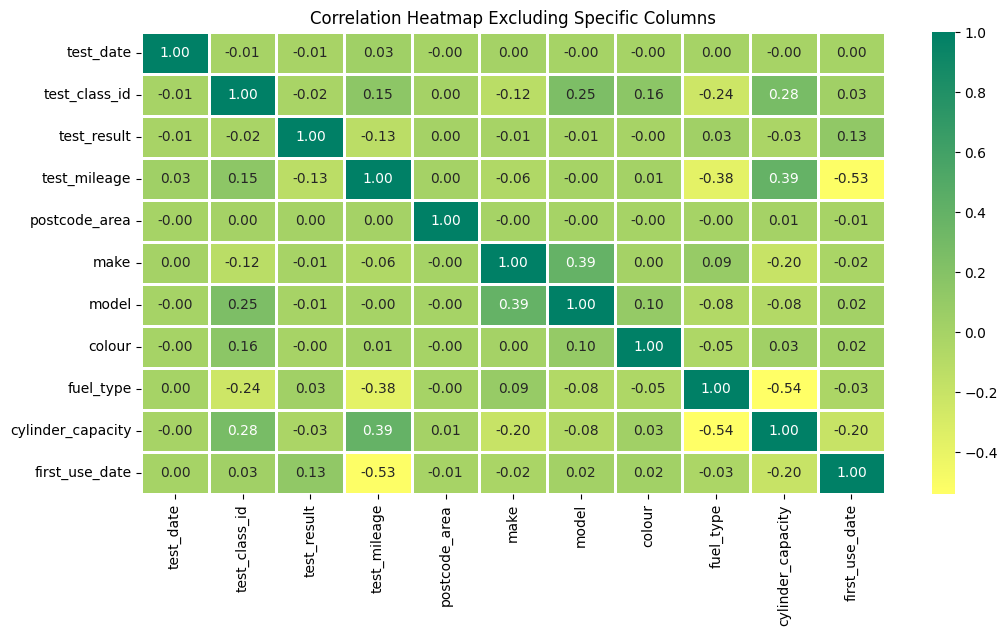

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Copy the DataFrame
mot_temp = mot.copy()

# Step 2: Drop columns that are not to be included in the correlation matrix
columns_to_exclude = ['vehicle_id', 'test_type', 'age', 'age_years', 'make_model', 'test_result_class', 'test_result_desc', 'fuel_type_desc']
mot_temp = mot_temp.drop(columns=columns_to_exclude, errors='ignore')  # Use errors='ignore' to handle cases where columns might not exist

# Step 3: Encode non-numeric attributes
label_encoders = {}
for column in mot_temp.columns:
    if mot_temp[column].dtype == object:  # Column has non-numeric data
        le = LabelEncoder()
        mot_temp[column] = le.fit_transform(mot_temp[column].astype(str))  # Convert and encode
        label_encoders[column] = le  # Store the encoder if needed later

# Step 4: Compute the correlation matrix
correlation_matrix = mot_temp.corr()

# Step 5: Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='summer_r',
            fmt='.2f',
            linewidths=2).set_title("Correlation Heatmap Excluding Specific Columns")
plt.show()


Notice that except for some obvious correlations (for example, `test_mileage` vs `first_use_date`), most of the correlations are reasonably weak. This means that the variables in the dataset do not have strong linear relationships with one another. When correlations are weak, it suggests that changes in one variable are not consistently associated with changes in another in a way that could be described using a simple linear equation. For analytical purposes, this can have several implications:

**Complex Relationships**: The weak correlations imply that if relationships do exist between the variables, they may be complex and not easily modeled by linear regression. Non-linear models or advanced statistical techniques such as decision trees or random forests might be more appropriate to capture the underlying patterns in the data.

**Multivariate Analysis**: In cases where correlations are weak, it might be useful to look at multivariate relationships, considering the impact of multiple variables at once rather than pairs of variables. Techniques such as Principal Component Analysis (PCA) or multiple regression could reveal combined effects of variables that are not apparent when looking at pairwise correlations alone.

**Data Transformation**: Sometimes, transforming the data can reveal underlying patterns that are not visible in the original scale or format. For example, applying a logarithmic or square root transformation to skewed data might expose stronger correlations that were not initially apparent.

**Exploring Causality**: Weak correlations also suggest caution when inferring causality. Correlation does not imply causation, and in the absence of strong correlations, even speculative causal relationships should be considered with greater skepticism. It may be necessary to use controlled experiments or causal inference models to explore if and how variables influence each other.

**Revisiting Data Collection**: Finally, weak correlations may indicate that important variables are missing from the analysis, and additional data collection might be needed. It might also suggest revisiting the data collection methodology to ensure that all relevant variables are accurately captured and that the data quality is sufficient to detect the underlying relationships.

## Exploratory analysis

Let's try and gather some insights from the data. We will start by looking at the most common make/model combinations available.

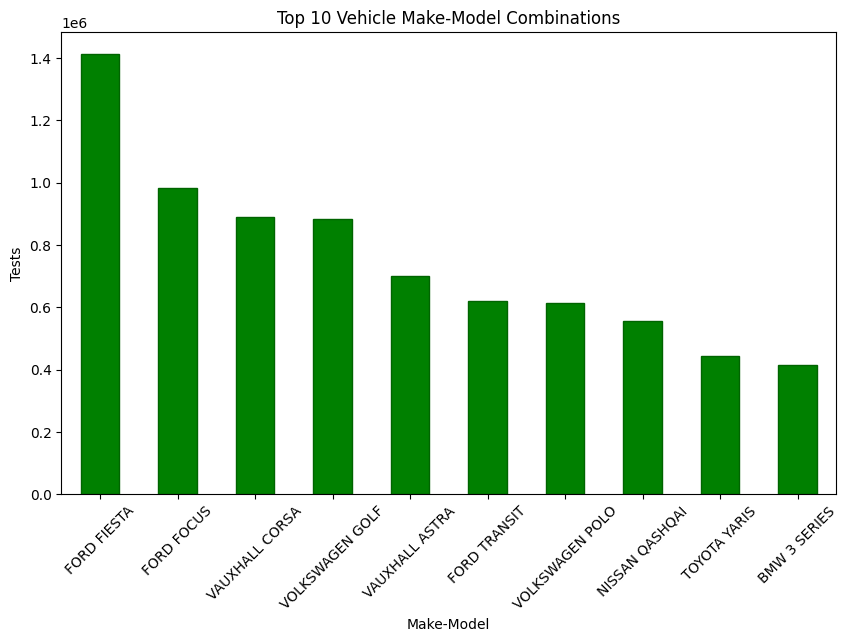

In [6]:
import matplotlib.pyplot as plt

# Calculate the top 10 most common make-model combinations
top_vehicles = mot['make_model'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_vehicles.plot(kind='bar', color='green', edgecolor='darkgreen')
plt.title('Top 10 Vehicle Make-Model Combinations')
plt.xlabel('Make-Model')
plt.ylabel('Tests')
plt.xticks(rotation=45)
plt.show()

That's interesting! The most common make/model combination is the Ford Fiesta, followed by the Ford Focus and the Vauxhall Corsa. These are all popular cars in the UK, so it makes sense that they are the most tested. Note that we are measuring *the number of tests* and not the number of cars, so it is possible that some cars have been tested multiple times.

Let's now perform a different visualisation which might be a bit more interesting, we will first show the distribution of car makes in relative terms as a treemap. In this case, let us remove any vehicle duplicates, so we only have one test per vehicle and therefore are comparing actual number of vehicles.

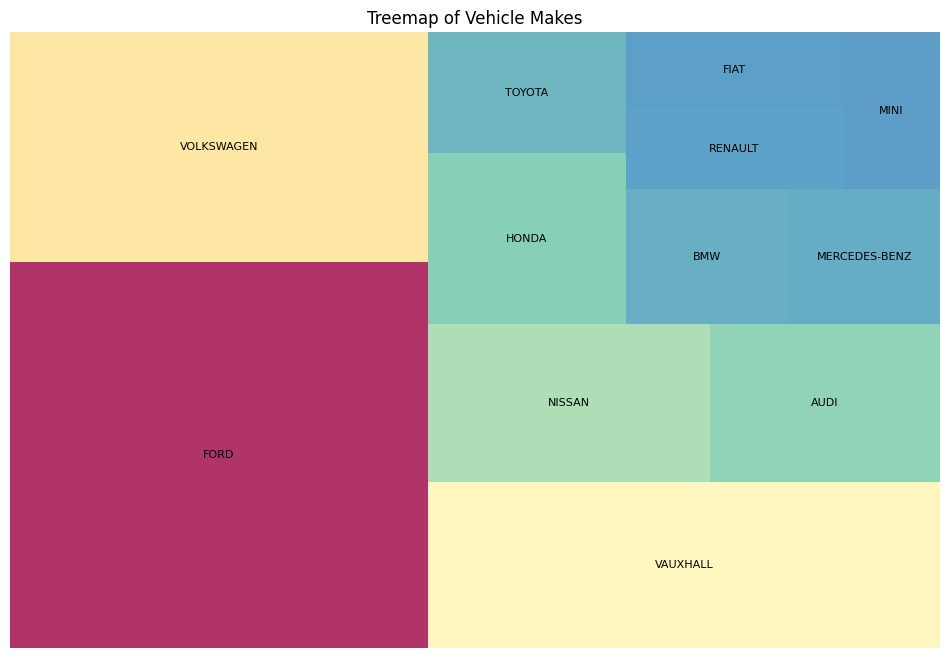

In [6]:
import squarify

# Calculate the top vehicle makes, while deduplicating for vehicle_id
counts = mot.drop_duplicates('vehicle_id')['make'].value_counts()

labels = counts.index
sizes = counts.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Vehicle Makes')
plt.axis('off')  # Remove axes
plt.show()

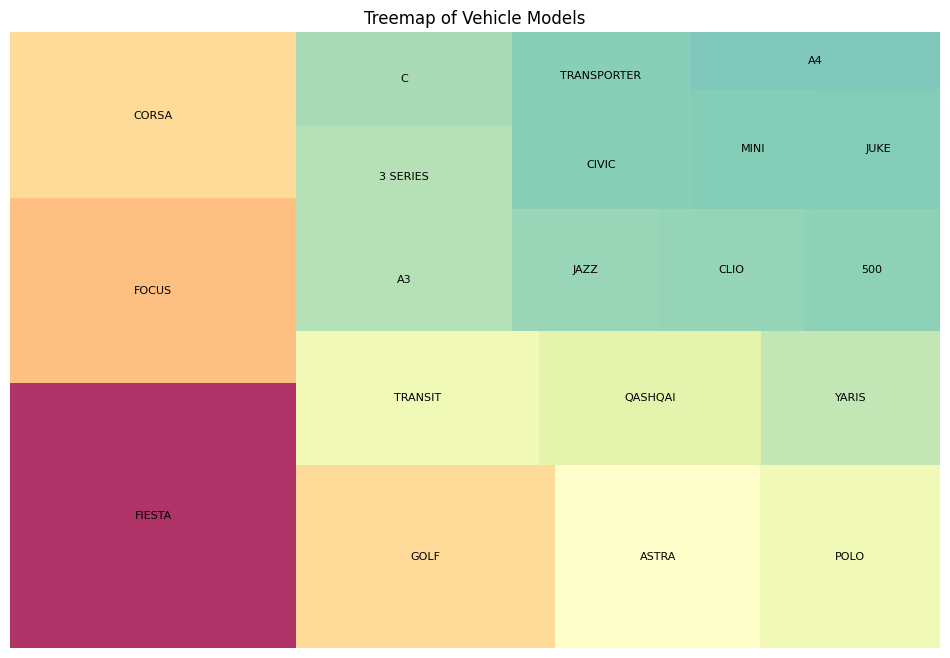

In [7]:
# Calculate the top vehicle models, while deduplicating for vehicle_id
counts = mot.drop_duplicates('vehicle_id')['model'].value_counts()

labels = counts.index
sizes = counts.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Vehicle Models')
plt.axis('off')  # Remove axes
plt.show()

This is quite informative! We can easily see the relative popularity of different models, and the color coding gives a great visual representation of the distribution of both makes and models.

Now let us look at how vehicle age, make and model is distributed - this will help us get a better picture of the test results for each make and model. First let us understand the overal distribution of vehicle age in the dataset, as an histogram.

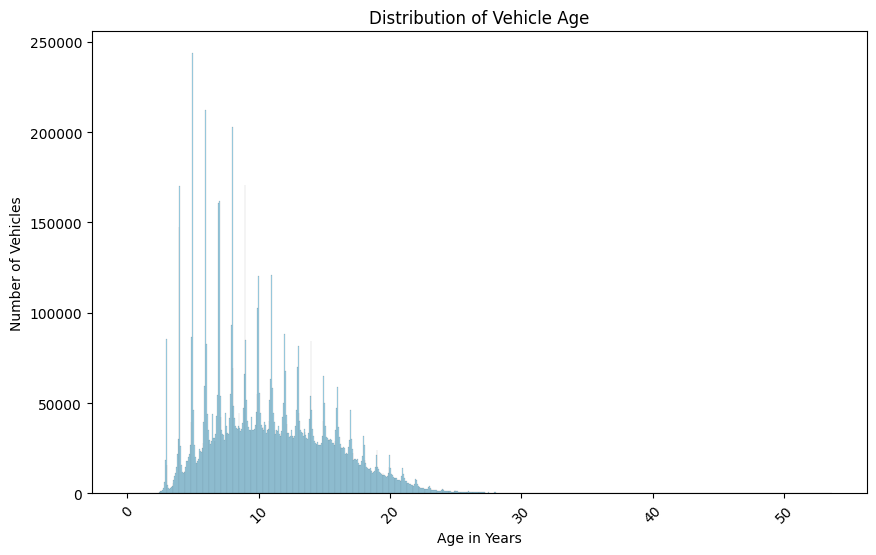

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(mot.drop_duplicates('vehicle_id')['age_years'], color='skyblue')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Age in Years')
plt.xticks(rotation=45)
plt.ylabel('Number of Vehicles')
plt.show()


```{attention}
What do you think the spikes in the histogram represent?
```

Again, super informative. It would however be interesting to understand this as percentiles as well, so let us add that.

0.25     7.000684
0.50    10.151951
0.75    14.078029
0.95    19.403149
Name: age_years, dtype: float64


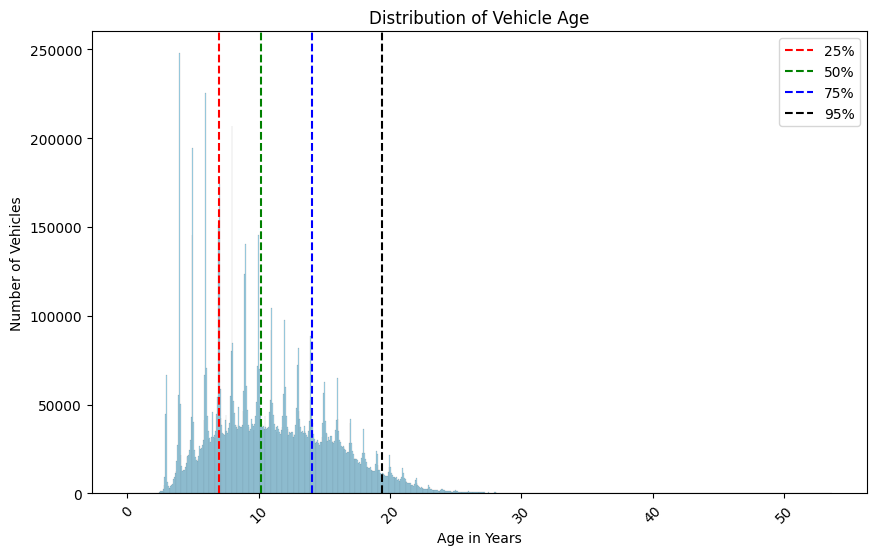

In [9]:
# Calculate and plot percentiles for the age_years column
percentiles = mot.drop_duplicates('vehicle_id')['age_years'].quantile([0.25, 0.5, 0.75, 0.95])
print(percentiles)

plt.figure(figsize=(10, 6))
sns.histplot(mot['age_years'], color='skyblue')
plt.axvline(percentiles.iloc[0], color='red', linestyle='--', label='25%')
plt.axvline(percentiles.iloc[1], color='green', linestyle='--', label='50%')
plt.axvline(percentiles.iloc[2], color='blue', linestyle='--', label='75%')
plt.axvline(percentiles.iloc[3], color='black', linestyle='--', label='95%')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Age in Years')
plt.xticks(rotation=45)
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

We conclude that only 25% of cars are newer than 7 years, and 50% are newer than 10 years. This information will be useful for our analysis, as we now know that half of the cars in the dataset are older than 10 years! Let us perform a similar analysis, but for mileage instead of age.

0.25     44724.0
0.50     71417.0
0.75    103510.0
0.95    159279.0
Name: test_mileage, dtype: float64


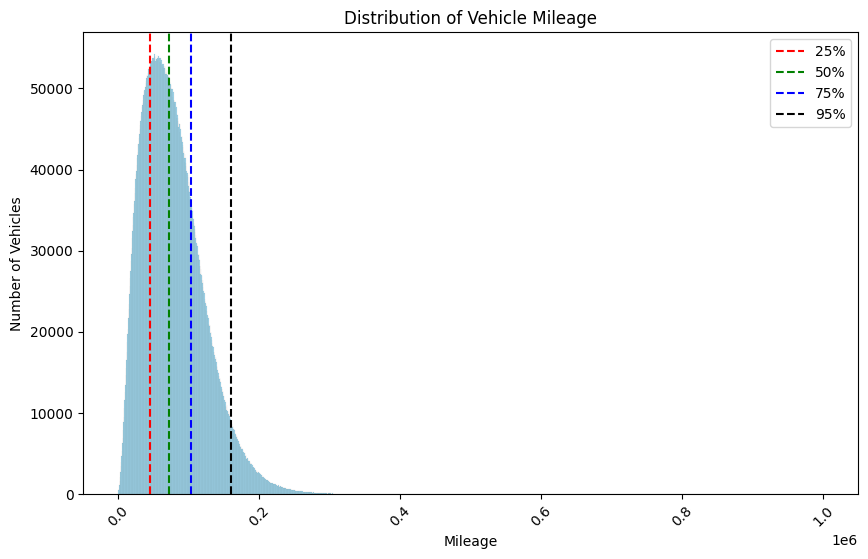

In [10]:
# Calculate and plot percentiles for the test_mileage column
percentiles = mot.drop_duplicates('vehicle_id')['test_mileage'].quantile([0.25, 0.5, 0.75, 0.95])
print(percentiles)

plt.figure(figsize=(10, 6))
sns.histplot(mot['test_mileage'], color='skyblue')
plt.axvline(percentiles.iloc[0], color='red', linestyle='--', label='25%')
plt.axvline(percentiles.iloc[1], color='green', linestyle='--', label='50%')
plt.axvline(percentiles.iloc[2], color='blue', linestyle='--', label='75%')
plt.axvline(percentiles.iloc[3], color='black', linestyle='--', label='95%')
plt.title('Distribution of Vehicle Mileage')
plt.xlabel('Mileage')
plt.xticks(rotation=45)
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

Lots of information here. We can see that only 25% of cars have a mileage of less than aproximately 44000 miles, and half the cars have over 70000 miles on the clock! This is quite a lot of mileage, and it will be interesting to see how this affects the test results.

Let us now visually try to understand these distributions of age and mileage for each make and model. We are only ilustrating the visualisation technique, so let us look at age only - we could easily do the same for mileage. We will use a stacked histogram, where the `y` axis is the percentage of cars in each age group, and the `x` axis is the age of the car.

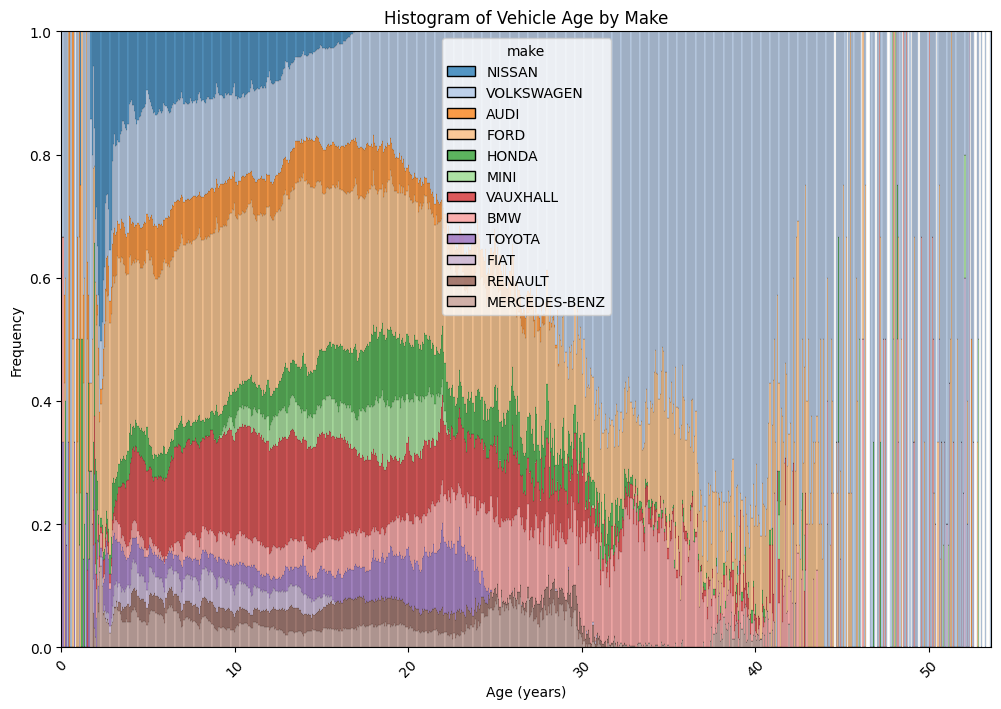

In [11]:
# Plot a matrix of histograms per make of the age of vehicles in years
plt.figure(figsize=(12, 8))
sns.histplot(data=mot, x='age_years', hue='make', multiple='fill', palette='tab20')
plt.title('Histogram of Vehicle Age by Make')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

There are *a lot* of old Volkswagens out on the road! This is quite interesting, and we can see that the distribution of ages for different makes is very different, ilustrating the popularity of different makes over time, a little bit like reading tree rings!

Let us perform the same analysis, but for models instead of makes.

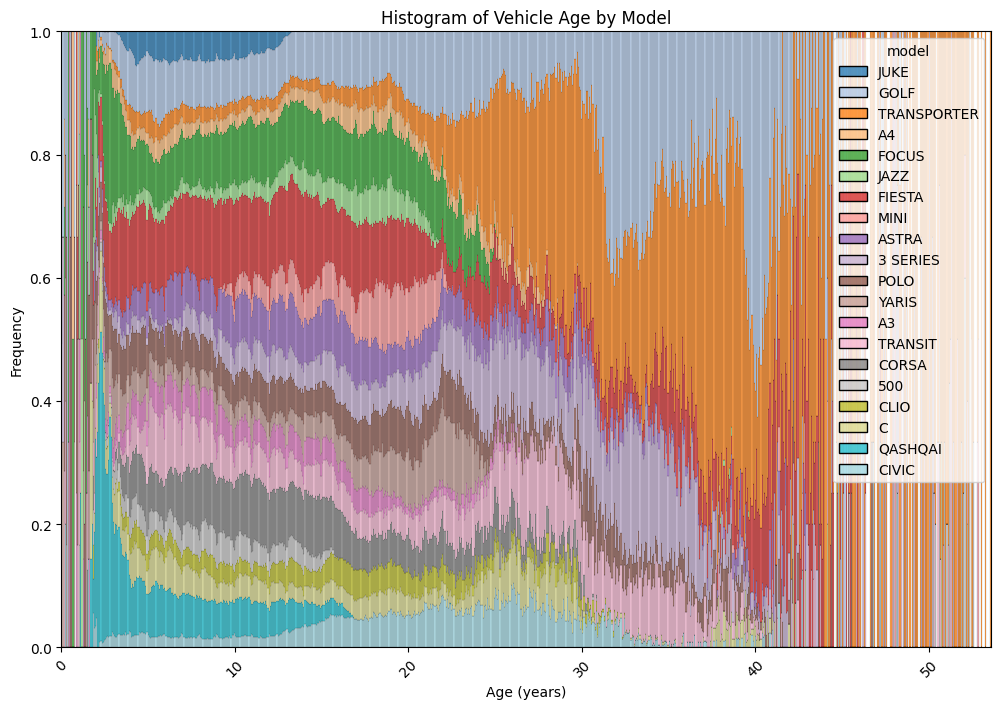

In [12]:
# Plot a matrix of histograms per model of the age of vehicles in years
plt.figure(figsize=(12, 8))
sns.histplot(data=mot, x='age_years', hue='model', multiple='fill', palette='tab20')
plt.title('Histogram of Vehicle Age by Model')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The number of Golf's and Transporter vans helps to explain the make distribution we saw before. The effect we see is quite striking, and just like car makers before, it ilustrates the popularity of different models over time.

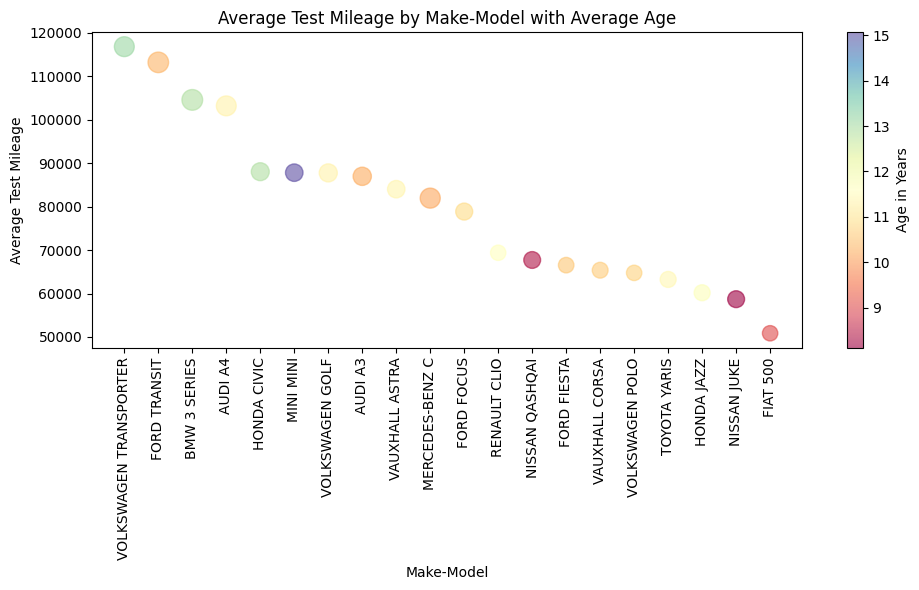

In [13]:
# Calculate the average test mileage
avg_mileage = mot.groupby(['model', 'make'])['test_mileage'].mean().reset_index()

# Calculate the average age in years for each model as a proxy for size
avg_age_years = mot.groupby(['model', 'make'])['age_years'].mean().reset_index()

# Calculate the average cylinder capacity for each model
avg_capacity = mot.groupby(['model', 'make'])['cylinder_capacity'].mean().reset_index()

# Merge the average mileage data with the average age years
merged_data = avg_mileage.merge(avg_age_years, on=['model', 'make'])

# Merge the merged data with the average capacity
merged_data = merged_data.merge(avg_capacity, on=['model', 'make'])

# Sort the data by average mileage
top_avg_mileage = merged_data.sort_values(by='test_mileage', ascending=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
scatter = plt.scatter(
    'model',  # x-axis
    'test_mileage',  # y-axis
    c=top_avg_mileage['age_years'],
    s = top_avg_mileage['cylinder_capacity']/10,  # Bubble size based on average cilinder capacity
    cmap='Spectral',  # Color map
    data=top_avg_mileage,  # Data source
    alpha=0.6,  # Transparency of the bubbles
)

# Add titles and labels
plt.title('Average Test Mileage by Model with Average Age')
plt.xlabel('Model')
plt.ylabel('Average Test Mileage')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Create colorbar
plt.colorbar(scatter, label='Average Age in Years')

# Show the plot
plt.tight_layout()
plt.show()


We should also analyze the 'Pass' ratio for each make and model, represented by the percentage of successful tests per make and model. This metric will provide insights into the reliability of different vehicles. Note that our focus is solely on 'NT' (Normal Test) test types to gauge general performance without considering retests.

```{attention}
This measure is a very simplistic proxy for reliability. In practice, we would need to consider other factors, such as the number of retests, the type of failures, etc.
```

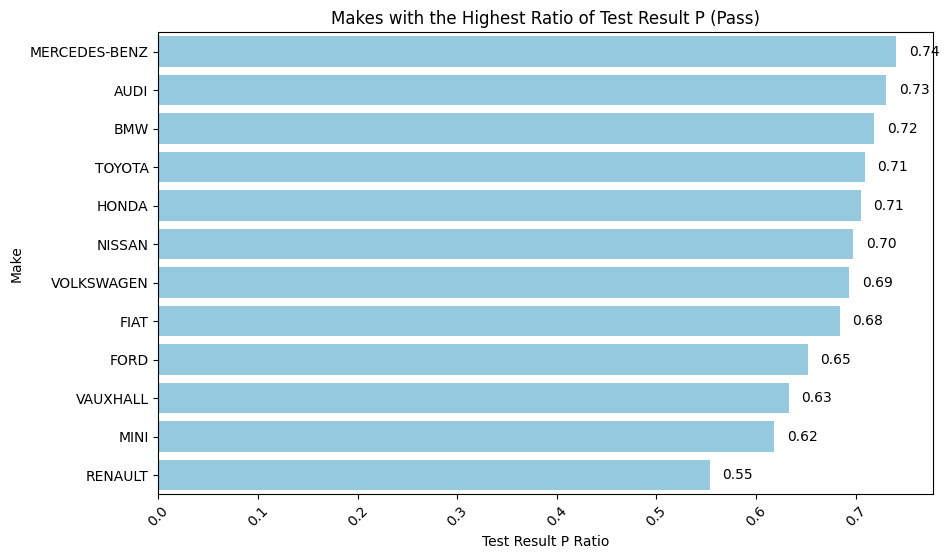

In [14]:

# Find the makes with the highest ratio of test_result = P
make_counts = mot['make'].value_counts()
make_p_counts = mot[mot['test_result'] == 'P']['make'].value_counts()
make_p_ratio = make_p_counts / make_counts
make_p_ratio = make_p_ratio.sort_values(ascending=False)

# Convert the Series to DataFrame for plotting
make_p_ratio_df = make_p_ratio.reset_index()
make_p_ratio_df.columns = ['Make', 'Test Result P Ratio']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    y='Make',  # Now 'Make' is on the y-axis
    x='Test Result P Ratio',  # And 'Test Result P Ratio' on the x-axis
    data=make_p_ratio_df,
    color='skyblue'
)

# Adding a title and labels
plt.title('Makes with the Highest Ratio of Test Result P (Pass)')
plt.ylabel('Make')  # Now this is the y-axis label
plt.xlabel('Test Result P Ratio')  # And this is the x-axis label

plt.xticks(rotation=45)
plt.yticks(rotation=0)  # You can adjust the rotation for readability if needed

# Add value labels next to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),  # Change to get_width() because width is the measure now
                     (p.get_width(), p.get_y() + p.get_height() / 2.),  # Adjust position to be at the end of the bar
                     ha='left', va='center',  # Align text to the left of the endpoint
                     xytext=(9, 0),  # Move text to the right a bit
                     textcoords='offset points')

barplot.set_facecolor('white')

# Show the plot
plt.show()


And now a similar analysis, but for models instead of makes.

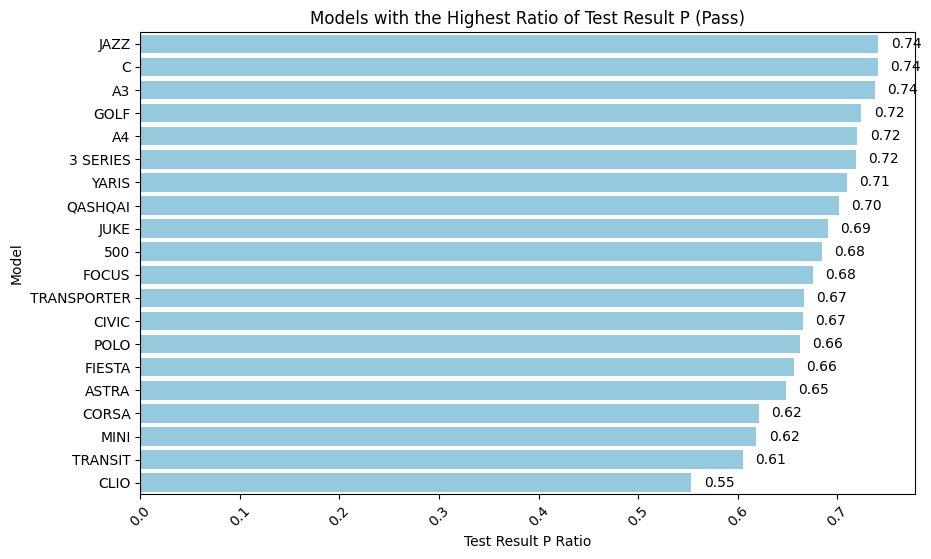

In [15]:

# Find the models with the highest ratio of test_result = P
model_counts = mot['model'].value_counts()
model_p_counts = mot[mot['test_result'] == 'P']['model'].value_counts()
model_p_ratio = model_p_counts / model_counts
model_p_ratio = model_p_ratio.sort_values(ascending=False)

# Convert the Series to DataFrame for plotting
model_p_ratio_df = model_p_ratio.reset_index()
model_p_ratio_df.columns = ['Model', 'Test Result P Ratio']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    y='Model',  # 'Model' is now on the y-axis
    x='Test Result P Ratio',  # 'Test Result P Ratio' is on the x-axis
    data=model_p_ratio_df,
    color='skyblue'
)

# Adding a title and labels
plt.title('Models with the Highest Ratio of Test Result P (Pass)')
plt.ylabel('Model')  # y-axis label is now 'Model'
plt.xlabel('Test Result P Ratio')  # x-axis label is 'Test Result P Ratio'

plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add value labels next to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),  # Using get_width() for horizontal bars
                     (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position at the end of the bar
                     ha='left', va='center',  # Align text to the left of the endpoint
                     xytext=(9, 0),  # Move text to the right a bit
                     textcoords='offset points')

barplot.set_facecolor('white')

# Show the plot
plt.show()

It would also be interesting to have a look at how the pass ratio is distributed by fuel type, so let us do that.

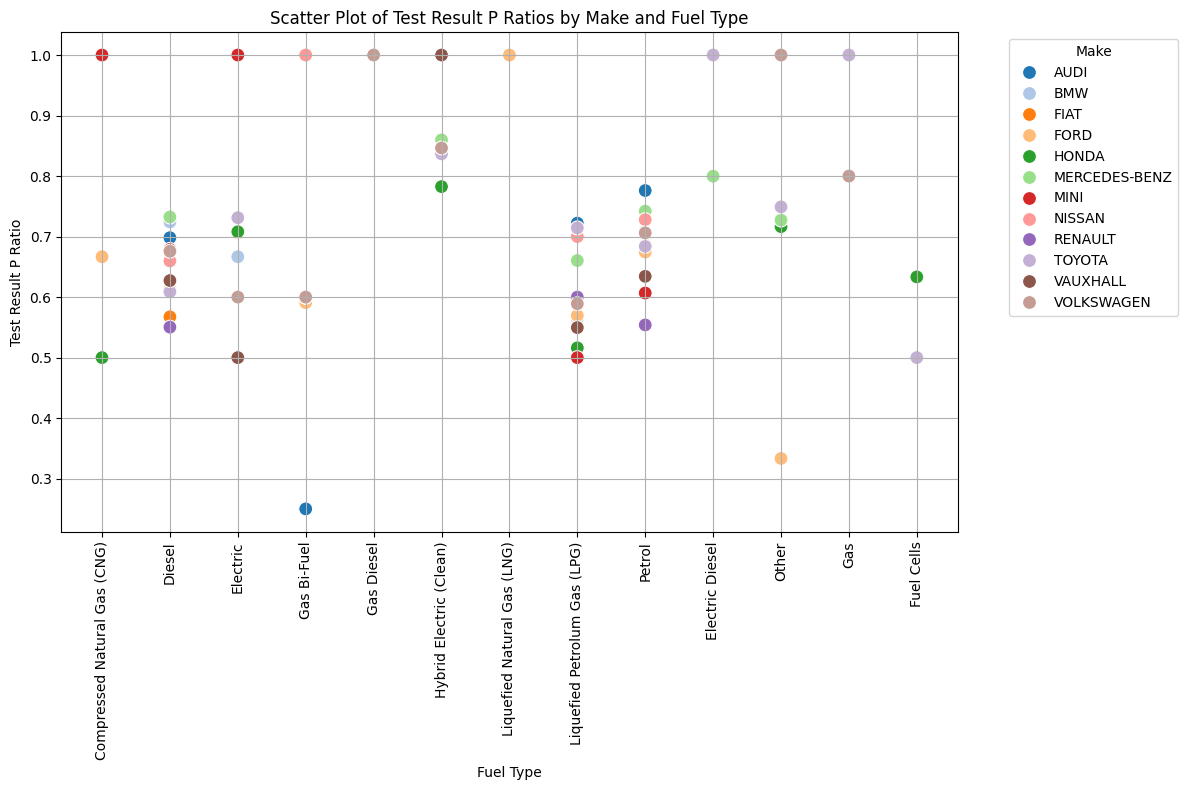

In [16]:

# Calculate counts and ratios as before, change to grouping by 'make'
make_fuel_counts = mot.groupby(['make', 'fuel_type_desc']).size()
make_p_fuel_counts = mot[mot['test_result'] == 'P'].groupby(['make', 'fuel_type_desc']).size()
make_p_ratio = make_p_fuel_counts / make_fuel_counts

# Resetting the index to turn the multi-index Series into a DataFrame
make_p_ratio_df = make_p_ratio.reset_index()
make_p_ratio_df.columns = ['Make', 'Fuel Type', 'Test Result P Ratio']

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='Fuel Type',
    y='Test Result P Ratio',
    hue='Make',  # Differentiate by make
    data=make_p_ratio_df,
    palette='tab20',  # Color palette
    s=100  # Size of the markers
)

plt.title('Scatter Plot of Test Result P Ratios by Make and Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Test Result P Ratio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for easier visual alignment

# Moving the legend outside the plot area to the right
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

Electric vehicles display a broad spectrum of pass ratios that differ notably depending on the manufacturer. This contrasts with petrol and diesel cars, which tend to exhibit more consistent pass rates across various makes. The observed disparity in the performance of electric cars suggests underlying differences in technology or quality control among manufacturers, or variability in testing standards. This pattern is intriguing and could provide valuable insights into the reliability and engineering of electric vehicles, making it a worthwhile subject for deeper analysis.

It would also be nice to understand the distribution of test results for each model. Let us try a visualisation which might help - we will facet a scatter plot for each model into a single grid.

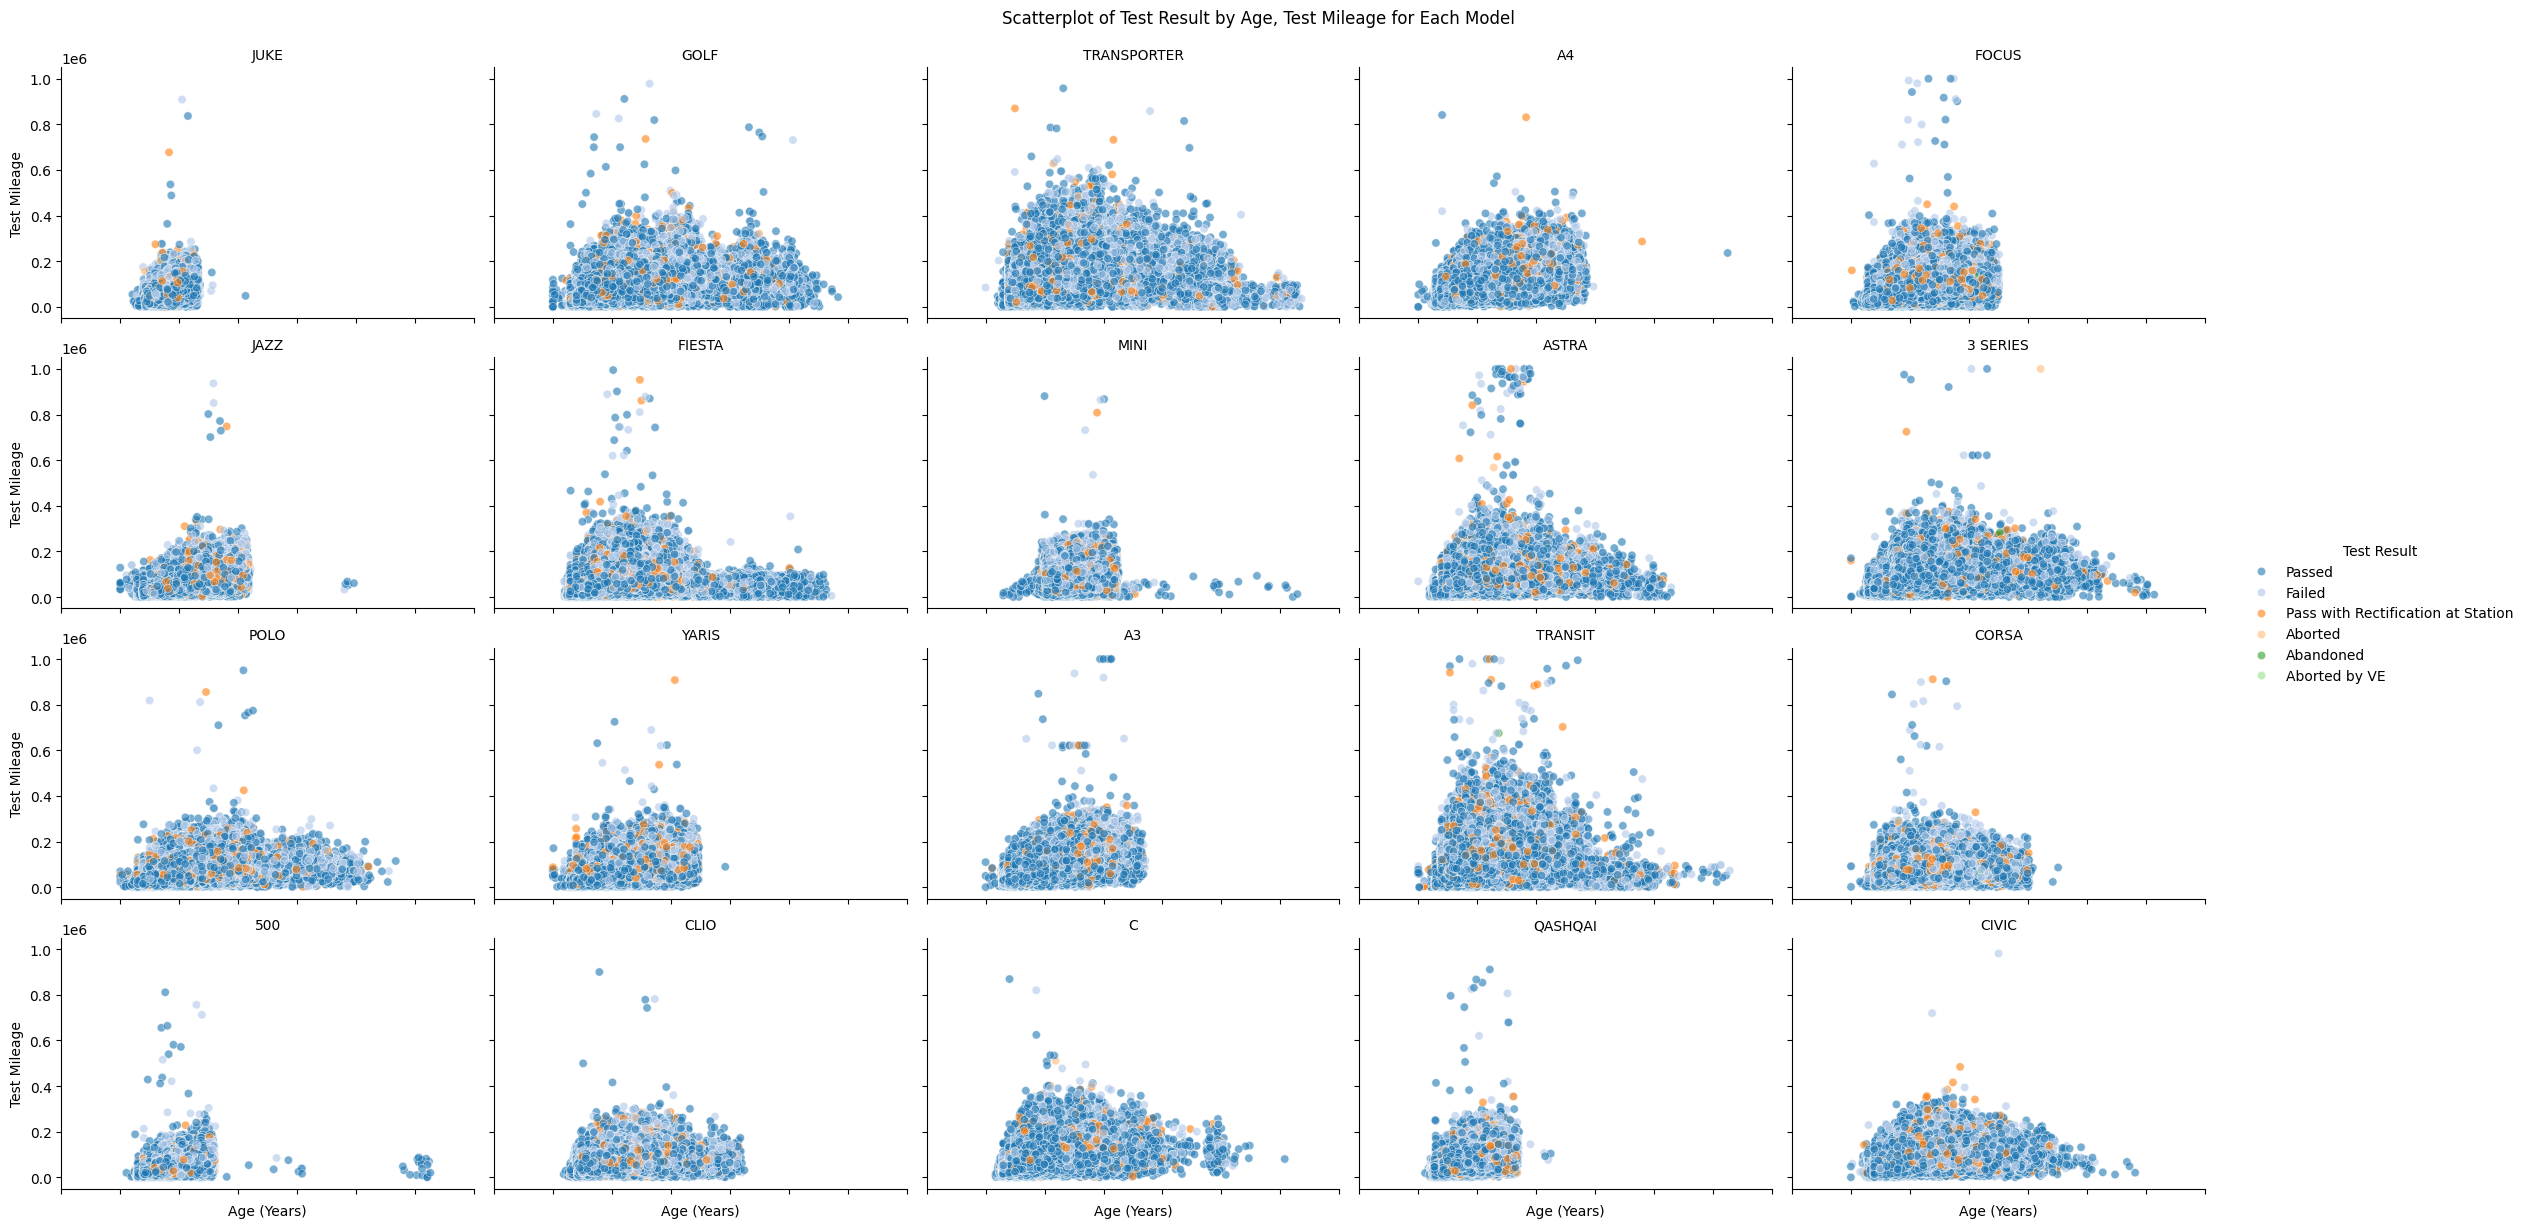

In [17]:
# Initialize a FacetGrid object
g = sns.FacetGrid(mot, col='model', col_wrap=5, aspect=1.5)

# Map the scatterplot with the Spectral colormap for the 'cylinder_capacity' which affects the color
g.map_dataframe(sns.scatterplot,
                'age_years',
                'test_mileage', 
                 alpha=0.6,
                 palette='tab20',
                 hue='test_result_desc',
                 hue_order=['Passed', 'Failed', 'Pass with Rectification at Station', 'Aborted', 'Abandoned', 'Aborted by VE']
                 )

# Add titles and tweak adjustments
g.set_titles("{col_name}")  # Use model names as titles for each subplot
g.set_axis_labels("Age (Years)", "Test Mileage")  # Set common axis labels
g.set_xticklabels(rotation=45)

# Add a legend and adjust layout
g.add_legend(title='Test Result')
g.tight_layout()

# Set the overall title
plt.suptitle('Scatterplot of Test Result by Age, Test Mileage for Each Model', y=1.02)

# Display the plots
plt.show()


This makes for an interesting way to look at the data, even if somewhat complex to interpret visually. However it helps us understand the distribution of test results for each model, and helps paint a narrative of the data. You can think of your own ideas on how to improve this, or take whole different approaches.

```{tip}
A great book I highly recomment is ["The Visual Display of Quantitative Information"](https://www.edwardtufte.com/tufte/books_vdqi?gad_source=1&gclid=Cj0KCQjwir2xBhC_ARIsAMTXk86rOtorEShrFpEEtS1Uie2aHGztvlDaQ-Qxl3coQhEr-B8X3IZQsWsaAntIEALw_wcB) by Edward Tufte. It is a great resource for learning how to visualise data in a way that is both informative and visually appealing.

## Understanding geographic distribution

It would also be interesting to understand the geographic distribution of test results. Let us start by calculating a table which summarises a few key metrics for each postcode area. We will use `pgeocode` to get the latitude and longitude of each postcode area.

In [13]:
import pgeocode
import numpy as np

# Ensure you have pgeocode installed
# pip install pgeocode

# Load your data into the 'mot' DataFrame
# mot = pd.read_csv('path_to_your_data.csv')

# Group by postcode_area, count the number of unique vehicle_ids
postcode_vehicle_counts = mot.groupby('postcode_area')['vehicle_id'].nunique()

# Group by postcode_area, compute the average test_mileage
postcode_avg_mileage = mot.groupby('postcode_area')['test_mileage'].mean()

# Group by postcode_area, compute the average age_years
postcode_avg_age = mot.groupby('postcode_area')['age_years'].mean()

# Group by postcode_area, compute the average Pass ratio
postcode_pass_ratio = mot[mot['test_result'] == 'P'].groupby('postcode_area').size() / mot.groupby('postcode_area').size()

# Merge the data into a single DataFrame
postcode_data = pd.concat([
    postcode_vehicle_counts, 
    postcode_avg_mileage, 
    postcode_avg_age, 
    postcode_pass_ratio], 
    axis=1
)
postcode_data.columns = ['Vehicle Count', 'Average Mileage', 'Average Age', 'Pass Ratio']

# Initialize the GeoData object for the United Kingdom ('GB' for Great Britain)
nomi = pgeocode.Nominatim('gb')

# Define a function to find valid latitude and longitude
def get_valid_lat_lon(postcode_area):
    # Try appending numbers 1 through 9 to the postcode area
    for i in range(1, 99):
        postcode = f"{postcode_area}{i}"
        location = nomi.query_postal_code(postcode)
        if not np.isnan(location.latitude) and not np.isnan(location.longitude):
            return pd.Series([location.latitude, location.longitude])
    return pd.Series([np.nan, np.nan])

# Apply the function to get latitudes and longitudes
postcode_data[['Latitude', 'Longitude']] = postcode_data.index.to_series().apply(get_valid_lat_lon)

# Display the final DataFrame
print(postcode_data.head())


               Vehicle Count  Average Mileage  Average Age  Pass Ratio  \
postcode_area                                                            
AB                     76551     65822.427711     9.366910    0.624138   
AL                     47749     70320.249599    10.638602    0.704644   
B                     335520     82220.577839    11.066041    0.707201   
BA                     90103     83215.718267    11.618009    0.623438   
BB                     91469     84170.459654    10.723622    0.705521   

                Latitude  Longitude  
postcode_area                        
AB             57.143700  -2.098100  
AL             51.750000  -0.333300  
B              52.481400  -1.899800  
BA             51.398462  -2.361469  
BB             53.773367  -2.463333  


Let us visualise this data per latitude and longitude, using a scatter plot, which should give us a rough aproximation of a map.

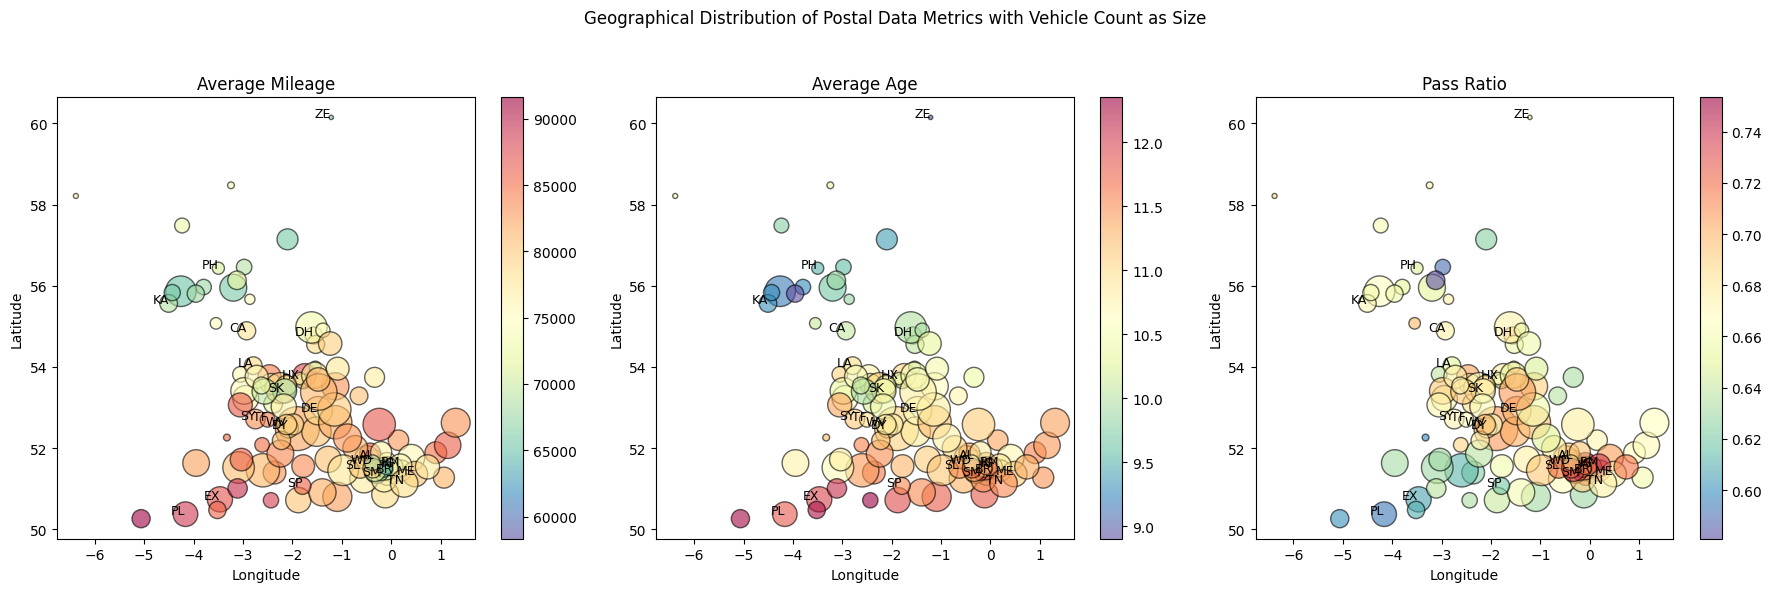

In [39]:
import matplotlib.colors as mcolors
import numpy as np

# Define the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Three plots in one row
fig.suptitle('Geographical Distribution of Postal Data Metrics with Vehicle Count as Size')

# Set up individual color maps and normalization
norms = {
    'Average Mileage': mcolors.Normalize(vmin=postcode_data['Average Mileage'].min(), vmax=postcode_data['Average Mileage'].max()),
    'Average Age': mcolors.Normalize(vmin=postcode_data['Average Age'].min(), vmax=postcode_data['Average Age'].max()),
    'Pass Ratio': mcolors.Normalize(vmin=postcode_data['Pass Ratio'].min(), vmax=postcode_data['Pass Ratio'].max()),
}

# Normalize vehicle counts for bubble sizes
# Using a scale factor to adjust the sizes to a visually pleasing range
vehicle_count_scaled = postcode_data['Vehicle Count'] / postcode_data['Vehicle Count'].max() * 1000  

metrics = ['Average Mileage', 'Average Age', 'Pass Ratio']
titles = ['Average Mileage', 'Average Age', 'Pass Ratio']
for i, ax in enumerate(axs):
    sc = ax.scatter(postcode_data['Longitude'], postcode_data['Latitude'], 
                    s=vehicle_count_scaled,  # Bubble size based on vehicle count
                    c=postcode_data[metrics[i]], 
                    norm=norms[metrics[i]], 
                    cmap='Spectral_r', alpha=0.6, edgecolor='k')
    ax.set_title(titles[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    # Create a colorbar for each subplot
    fig.colorbar(sc, ax=ax, orientation='vertical')

# Randomly select 25 postcode areas to label
random_postcodes = np.random.choice(postcode_data.index, size=25, replace=False)
# Add labels for randomly selected postcodes
for i, ax in enumerate(axs):
    for postcode in random_postcodes:
        x, y = postcode_data.loc[postcode, 'Longitude'], postcode_data.loc[postcode, 'Latitude']
        ax.text(x, y, postcode, fontsize=9, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the main title

plt.show()




Can you see the rough shape of the UK in the scatter plot? This is a very simple way to visualise geographic data, and it is quite effective for a quick analysis. We can see that most of the data is concentrated in the south of the UK, which is expected as this is the most populated area.

Looking at the scatter plots, we can derive a few insights based on the geographical distribution of vehicle data across the UK:

**Average Mileage**: The distribution suggests that vehicles in the northern regions generally have higher mileage, indicated by the larger, more intense colored circles in the north compared to the south. This might suggest longer commutes or more frequent use of vehicles in these areas.

**Average Age**: There's a clear gradient of vehicle age from north to south. The northern parts display younger vehicle ages (smaller, lighter colored circles), while the southern regions have older vehicles (larger, darker colored circles). This might indicate economic variations or preferences for newer vehicles in the north.

**Pass Ratio**: The pass ratio varies significantly across different regions. The southeast appears to have higher pass ratios (darker circles), which may correlate with better vehicle maintenance or newer cars in these areas. Conversely, some northern areas show lower pass ratios (lighter circles), possibly due to the older vehicle age or higher usage affecting vehicle conditions.

These observations hint at regional differences in vehicle usage, maintenance, and age which could be driven by socioeconomic factors, infrastructure, or regional policies. This geographic visualization effectively highlights how vehicle conditions and usage can vary within a country, prompting further investigation into the causes behind these patterns.

Let us now try a similar plot, but focusing on the top/bottom postcode areas for each metric, to highlight the extremes.

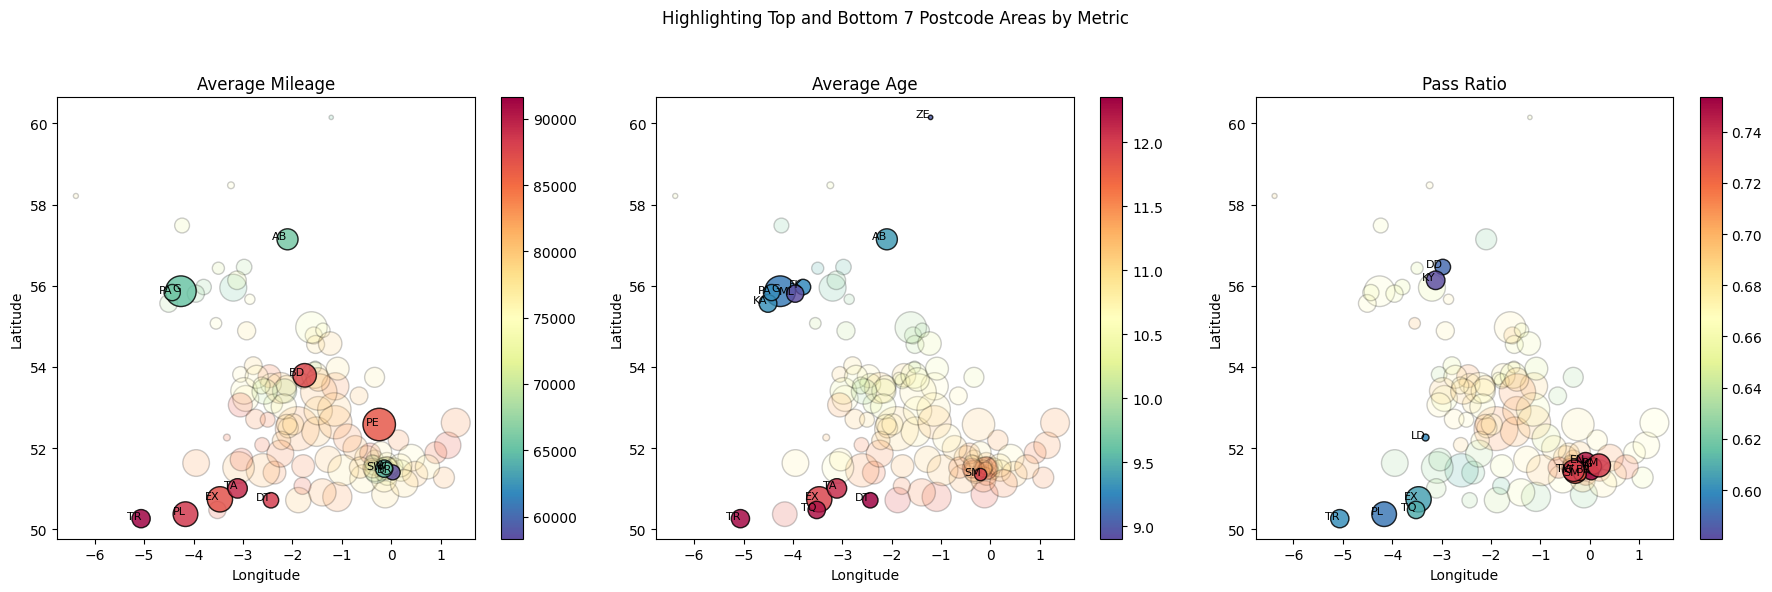

In [40]:

# Define the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Three plots in one row
fig.suptitle('Highlighting Top and Bottom 7 Postcode Areas by Metric')

# Set up individual color maps and normalization
norms = {
    'Average Mileage': mcolors.Normalize(vmin=postcode_data['Average Mileage'].min(), vmax=postcode_data['Average Mileage'].max()),
    'Average Age': mcolors.Normalize(vmin=postcode_data['Average Age'].min(), vmax=postcode_data['Average Age'].max()),
    'Pass Ratio': mcolors.Normalize(vmin=postcode_data['Pass Ratio'].min(), vmax=postcode_data['Pass Ratio'].max()),
}

# Normalize vehicle counts for bubble sizes
vehicle_count_scaled = postcode_data['Vehicle Count'] / postcode_data['Vehicle Count'].max() * 1000  

# Determine top and bottom 7 postcodes for each metric
top_bottom_7 = {
    'Average Mileage': postcode_data['Average Mileage'].nlargest(7).index.union(postcode_data['Average Mileage'].nsmallest(7).index),
    'Average Age': postcode_data['Average Age'].nlargest(7).index.union(postcode_data['Average Age'].nsmallest(7).index),
    'Pass Ratio': postcode_data['Pass Ratio'].nlargest(7).index.union(postcode_data['Pass Ratio'].nsmallest(7).index)
}

metrics = ['Average Mileage', 'Average Age', 'Pass Ratio']
titles = ['Average Mileage', 'Average Age', 'Pass Ratio']
for i, ax in enumerate(axs):
    # All postcodes with lower alpha
    ax.scatter(postcode_data['Longitude'], postcode_data['Latitude'], 
               s=vehicle_count_scaled, 
               c=postcode_data[metrics[i]], 
               alpha=0.2, cmap='Spectral_r', 
               norm=norms[metrics[i]], edgecolor='k')
    
    # Highlight top and bottom 7 postcodes with higher alpha
    highlight_data = postcode_data.loc[top_bottom_7[metrics[i]]]
    ax.scatter(highlight_data['Longitude'], highlight_data['Latitude'],
               s=vehicle_count_scaled.loc[top_bottom_7[metrics[i]]], 
               c=highlight_data[metrics[i]], 
               alpha=0.8, cmap='Spectral_r', 
               norm=norms[metrics[i]], edgecolor='k')
    
    # Annotate top and bottom 7 postcodes, ensuring coordinates are finite
    for postcode in top_bottom_7[metrics[i]]:
        x = postcode_data.loc[postcode, 'Longitude']
        y = postcode_data.loc[postcode, 'Latitude']
        if np.isfinite(x) and np.isfinite(y):
            ax.text(x, y, postcode, fontsize=8, ha='right', color='black')
    
    ax.set_title(titles[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    # Create a colorbar for each subplot
    fig.colorbar(plt.cm.ScalarMappable(norm=norms[metrics[i]], cmap='Spectral_r'), ax=ax, orientation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the main title

plt.show()


## Developing a classification model

Let us now develop a classification model to predict the likely test result of a car based on some of its features. You might have noticed above that there is a wide disparity in the number of tests for different makes and models, as well as the test results. To ensure we have a true representation of the original distribution, we will perform stratified sampling to ensure we have a balanced dataset.

```{index} Stratified sampling
```

```{tip}
Stratified sampling is a statistical method used to ensure that specific subgroups within a dataset are adequately represented when taking a sample. This approach involves dividing the entire population into different subgroups known as strata, which are based on shared characteristics. Once the population is divided, a sample is drawn from each stratum. 

The main reason for using stratified sampling is to capture the population heterogeneity in the sample. For example, if you were conducting a survey on a population consisting of both males and females and you know that their responses might vary significantly based on gender, stratified sampling allows you to ensure that both genders are properly represented in the sample according to their proportion in the full population. This method enhances the accuracy of the results since each subgroup is proportionally represented, and it also increases the overall efficiency of the sampling process because it can require fewer resources to achieve more precise results.

Stratified sampling is especially valuable when analysts need to ensure that smaller but important subgroups within the population are not overlooked. By ensuring that these subgroups are adequately sampled, researchers can draw more accurate and generalizable conclusions from their data analysis. This makes stratified sampling a preferred method in fields where precision in population representation is crucial, such as in medical research, market research, and social science studies.
```

We will sample on the `test_result_desc` column, as this is the target variable we are trying to predict.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

def stratified_sample(data, column, fraction):
    # Use train_test_split to perform the stratified sampling
    _, sampled = train_test_split(
        data, 
        test_size=fraction, 
        stratify=data[column],  # Stratify by the column to keep the distribution
        random_state=42  # For reproducibility
    )

    # Drop any categories with less than 100 samples
    sampled = sampled.groupby(column).filter(lambda x: len(x) > 100)
    
    return sampled

def balanced_sample(data, column, fraction):
    total_samples = int(len(data) * fraction)
    num_classes = data[column].nunique()
    target_size_per_class = int(total_samples / num_classes)

    # Find the maximum size of any class
    max_class_size = data[column].value_counts().max()

    resampled_data = pd.DataFrame()
    for class_index, group in data.groupby(column):
        # Sample without replacement if group size is larger than the target, otherwise keep the group as is
        if len(group) >= target_size_per_class:
            resampled_group = resample(group,
                                       replace=False,  # Sample without replacement
                                       n_samples=target_size_per_class,
                                       random_state=42)
        else:
            # If the group size is less than the target, and also smaller than the maximum class size, do not resample
            resampled_group = group  # keep the original group unchanged

        resampled_data = pd.concat([resampled_data, resampled_group], axis=0)

    return resampled_data.reset_index(drop=True)

# Our target for prediction
target = 'test_result_class'

# Use only a fraction of the data for faster processing and less memory usage
mot_encoded = stratified_sample(mot, target, 0.999)

# Show the distribution of the test_result column
print(mot_encoded[target].value_counts())
print(mot_encoded.shape)

test_result_class
Pass     7874347
Fail     2748469
Other      68257
Name: count, dtype: int64
(10691073, 19)


Now we will do a number of things:

1. Since we have a number of categorical variables, and will be evaluating a `LightGBM` classification model, we will need to encode these variables.
2. We will split the data into training and testing sets, but based on a fraction of the original set (to fit on the memory constraints of my environment).
3. To ensure a balanced dataset, we will use class weights in the model parameters - in this case, we will use the `balanced` class weight strategy.
4. We will finally train the model and evaluate its performance, using `GridSearchCV` to find the best hyperparameters.

```{index} LightGBM
```

```{tip}
LightGBM (Light Gradient Boosting Machine) is an efficient and scalable implementation of gradient boosting framework by Microsoft. It is designed to be distributed and efficient with the following advantages: faster training speed and higher efficiency, lower memory usage, better accuracy, support of parallel and GPU learning, and capable of handling large-scale data.

The core algorithm of LightGBM is based on decision tree algorithms and uses gradient boosting. Trees are built leaf-wise as opposed to level-wise as commonly seen in other boosting frameworks like XGBoost. This means that LightGBM will choose the leaf with max delta loss to grow during tree growth. It can reduce more loss than a level-wise algorithm, which is one of the main reasons for its efficiency.

Core Concepts and Techniques

**Gradient Boosting**: Like other boosting methods, LightGBM converts weak learners into a strong learner in an iterative fashion. It constructs new trees that model the errors or residuals of the prior trees added together as a new prediction.

**Histogram-based Algorithms**: LightGBM uses histogram-based algorithms for speed and memory efficiency. It buckets continuous feature (attribute) values into discrete bins which speeds up the training process and reduces memory usage significantly.

**Leaf-wise Tree Growth**: Unlike other boosting frameworks that grow trees level-wise, LightGBM grows trees leaf-wise. It chooses the leaf that minimizes the loss, allowing for lower-loss models and thus leading to better accuracy.

Mathematically, the objective function that LightGBM minimizes can be described as follows:

$$
L(\Theta) = \sum_{i=1}^N l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k)
$$

where $\mathbf{N}$ is the number of data points, $\mathbf{y_i}$ is the actual label, $\hat{y}_i$ is the predicted label, $\mathbf{l}$ is the loss function, $\mathbf{K}$ is the number of trees, $\mathbf{f_k}$ is the model from tree $\mathbf{k}$, and $\mathbf{\Omega}$ is the regularization term.

**Loss Function**: The loss function $l(y, \hat{y})$ depends on the specific task (e.g., mean squared error for regression, logistic loss for binary classification).

**Regularization**: LightGBM also includes regularization terms $\Omega(f)$, which help to prevent overfitting. These terms can include L1 and L2 regularization on the weights of the leaves.

**Exclusive Feature Bundling (EFB)**: This is an optimization to reduce the number of features in a dataset with many sparse features. EFB bundles mutually exclusive features (i.e., features that rarely take non-zero values simultaneously) into a single feature, thus reducing the feature dimension without hurting model accuracy.

**GOSS (Gradient-based One-Side Sampling)** and **DART (Dropouts meet Multiple Additive Regression Trees)** are other techniques LightGBM uses to manage data samples and boost performance effectively.

LightGBM is highly customizable with a lot of hyper-parameters such as `num_leaves`, `min_data_in_leaf`, and `max_depth`, which control the complexity of the model. Hyper-parameter tuning plays a crucial role in harnessing the full potential of LightGBM.
```

Let us now encode all categorical features in the dataset (`LightGBM` cannot handle unencoded categories), and split the data into training and testing sets.

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical columns
le = LabelEncoder()
categorical_features = ['make', 'model', 'fuel_type', 'postcode_area', 'test_result_class']
for col in categorical_features:
    mot_encoded[col] = le.fit_transform(mot_encoded[col])

features = ['test_mileage', 'test_class_id', 'cylinder_capacity', 'age_years', 'make', 'model', 'fuel_type', 'postcode_area']
X = mot_encoded[features]
y = mot_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are now ready to train the models. We will train a `LightGBM` classifier, using `GridSearchCV` to find the best hyperparameters.

In [35]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import time

# Setting up parameter grids for each model
param_grid = {
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42, verbosity=-1),
        'params': {
            'num_leaves': [31, 62, 128],  # Most impactful on complexity and overfitting
            'n_estimators': [50, 100],  # Directly impacts model performance and training time
            'class_weight': [None, 'balanced'],  # Important for class imbalance
            'objective': ['multiclass'],  # For multi-class classification
            'metric': ['multi_logloss'],  # Logarithmic loss for multi-class classification
        }
    },
}


# Store results
results = []

# Define scoring metric
scoring = 'balanced_accuracy'

# Run GridSearchCV for each model
for model_name, mp in param_grid.items():
    print(f'Running GridSearchCV for {model_name}')
    start_time = time.time()
    clf = GridSearchCV(mp['model'], mp['params'], scoring=scoring, verbose=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    end_time = time.time()
    print(f'Finished in {end_time - start_time:.2f} seconds')
    feature_importances = dict(zip(X_train.columns, clf.best_estimator_.feature_importances_))
    results.append({
        'model_name': model_name,
        'model': clf.best_estimator_,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'train_duration': end_time - start_time,
        'feature_importances': feature_importances
    })
    elapsed_time = time.time() - start_time  # Correctly compute the elapsed time
    print(f'{model_name} best params: {clf.best_params_}, best score: {clf.best_score_}, time: {elapsed_time} seconds')

# Display results
for result in results:
    print(f"Model: {result['model_name']}")
    print(f"\tBest Score: {result['best_score']}")
    print(f"\tBest Parameters: {result['best_params']}")
    print(f"\tTraining Duration: {result['train_duration']} seconds")
    print(f"\tFeature Importances: {result['feature_importances']}")


Running GridSearchCV for LightGBM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Finished in 1068.10 seconds
Model: LightGBM
	Best Score: 0.7207387359648975
	Best Parameters: {'class_weight': 'balanced', 'metric': 'multi_logloss', 'n_estimators': 100, 'num_leaves': 128, 'objective': 'multiclass'}
	Training Duration: 1068.102204322815 seconds
	Feature Importances: {'test_mileage': 8274, 'test_class_id': 554, 'cylinder_capacity': 4484, 'age_years': 9167, 'make': 2299, 'model': 3361, 'fuel_type': 560, 'postcode_area': 9401}


Let's look at feature importance as determined by the model.

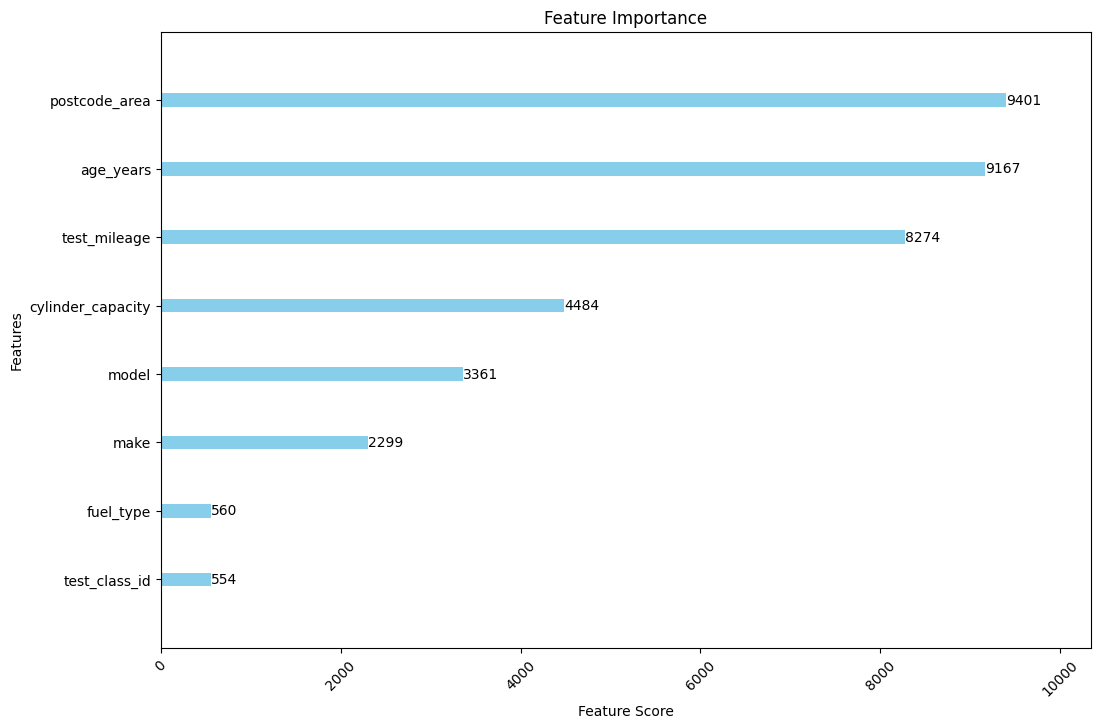

In [42]:
# Find the best model from the results
best_model = max(results, key=lambda x: x['best_score'])

# Plot feature importances
lgb.plot_importance(best_model['model'],
                    title='Feature Importance',
                    xlabel='Feature Score',
                    ylabel='Features',
                    figsize=(12, 8),
                    color='skyblue',
                    grid=False)
plt.xticks(rotation=45)
plt.show()

Somewhat surprisingly, the most important feature is `postcode_area`, followed by `age_years` and `test_mileage`.

```{tip}
`postcode_area` is probably hinting at some underlying socio-economic factors that might be influencing the test results. It is interesting to see that this is the most important feature, and it might be worth investigating further.
```

Now that we know the best performing set of hyperparameters, let's run some predictions on the test set and evaluate the model's performance. Note that in a real-world scenario, you would likely want to evaluate the model on a separate validation set to ensure that it generalizes well to unseen data, which is not what we are doing here.

```{tip}
Selecting the right hyperparameters for a machine learning model is a crucial step in the model development process. Hyperparameters are the configuration settings used to tune the learning algorithm, and they can significantly impact the performance of the model. Using `GridSearchCV` allows you to search through a grid of hyperparameters and find the best combination that maximizes the model's performance, as measured by a specified evaluation metric. However, it is important to note that hyperparameter tuning can be computationally expensive, especially when searching through a large grid of hyperparameters. Therefore, it is essential to balance the trade-off between computational resources and model performance when tuning hyperparameters, as well as understanding model performance to target the most impactfull hyperparameters.
```

In [38]:
y_pred = best_model['model'].predict(X_test)


Let's print the classification report for the model, as well as the confusion matrix.

              precision    recall  f1-score   support

        Fail       0.37      0.68      0.48    551359
       Other       0.70      0.89      0.78     13670
        Pass       0.84      0.59      0.70   1573186

    accuracy                           0.62   2138215
   macro avg       0.64      0.72      0.65   2138215
weighted avg       0.72      0.62      0.64   2138215

Accuracy: 0.6193039521282939


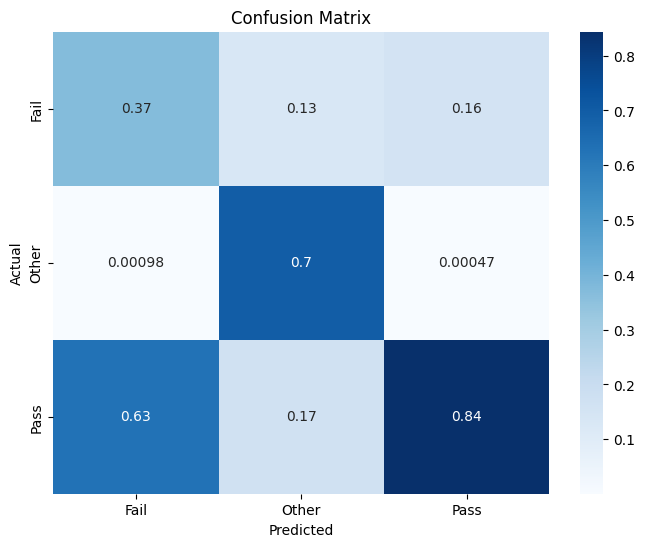

In [39]:
from sklearn.metrics import confusion_matrix

# Display the classification report and accuracy score, decode the labels
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=1))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='pred')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Analysis of training results

Here's an interpretation of the metrics for each of the target classes, followed by overall model performance:

- **Fail**:
  - **Precision**: 37% of instances predicted as "Fail" were actually "Fail."
  - **Recall**: The model correctly identified 68% of all actual "Fail" instances.
  - **F1-Score**: A harmonic mean of precision and recall, standing at 48%, indicates moderate effectiveness for this class, somewhat hindered by relatively low precision.
  - **Support**: There are 551,359 actual instances of "Fail" in the test data.

- **Other**:
  - **Precision**: 70% of instances predicted as "Other" were correct.
  - **Recall**: The model successfully identified 89% of all actual "Other" instances.
  - **F1-Score**: At 78%, this score shows relatively strong performance in predicting the "Other" class, supported by both high precision and recall.
  - **Support**: There are 13,670 actual instances of "Other" in the test data.

- **Pass**:
  - **Precision**: 84% of instances predicted as "Pass" were correct.
  - **Recall**: The model correctly identified 59% of all actual "Pass" instances.
  - **F1-Score**: The score is 70%, indicating good prediction power, although this is lowered by the recall being significantly less than the precision.
  - **Support**: There are 1,573,186 actual instances of "Pass" in the test data.

- **Overall Model Performance**:
  - **Accuracy**: Overall, the model correctly predicted the class of 62% of the total cases in the dataset.
  - **Macro Average Precision**: On average, the model has a precision of 64% across classes, which does not take class imbalance into account.
  - **Macro Average Recall**: On average, the model has a recall of 72% across classes, indicating better sensitivity than precision.
  - **Macro Average F1-Score**: The average F1-score across classes is 65%, reflecting a balance between precision and recall without considering class imbalance.
  - **Weighted Average Precision**: Adjusted for class frequency, the precision is 72%, indicating a good predictive performance where it matters the most in terms of sample size.
  - **Weighted Average Recall**: Matches the overall accuracy.
  - **Weighted Average F1-Score**: Stands at 64%, factoring in the actual distribution of classes, showing overall model effectiveness is moderate, skewed somewhat by performance on the most populous class.

This report shows that while the model performs quite well in identifying "Other" and reasonably well on "Pass," it struggles with precision for "Fail." The recall is high for "Fail," suggesting the model is sensitive but not precise, potentially leading to many false positives. The high macro averages relative to the accuracy indicate performance variability across classes.

## Final remarks

In this experiment, we have analysed the MOT test results of cars in the UK, focusing on the top most tested cars in the dataset. We have performed some exploratory analysis to understand the distribution of test results, vehicle age, and mileage, and have developed a classification model to predict the likely test result of a car based on its features.

The model we developed is a `LightGBM` classifier, trained on a balanced dataset using stratified sampling. The model achieved an overall accuracy of 62%, with varying performance across different classes. While the model performed well in identifying the "Other" class and reasonably well on "Pass," it struggled with precision for "Fail." This suggests that the model may be overly sensitive in predicting "Fail," leading to many false positives.

In future work, it would be interesting to explore additional features that may influence the test results. It would also be beneficial to investigate the impact of socio-economic factors, such as the area where the vehicle is registered, on the test results. Additionally, further tuning of the model hyperparameters and feature engineering could potentially improve the model's performance.